In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


#displaying table
df = pd.read_csv('Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
print("Shape:", df.shape)

Shape: (5000, 7)


In [8]:
print("Columns:", df.columns)

Columns: Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [9]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [11]:
#check if thedre are any null values

df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [13]:
#dropping address column

df.drop("Address", axis = 1, inplace=True)

In [15]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [20]:
df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].astype('int64')
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].astype('int64')

In [21]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7,4,23086.80050,1.059034e+06
1,79248.64245,6.002900,6,3,40173.07217,1.505891e+06
2,61287.06718,5.865890,8,5,36882.15940,1.058988e+06
3,63345.24005,7.188236,5,3,34310.24283,1.260617e+06
4,59982.19723,5.040555,7,4,26354.10947,6.309435e+05


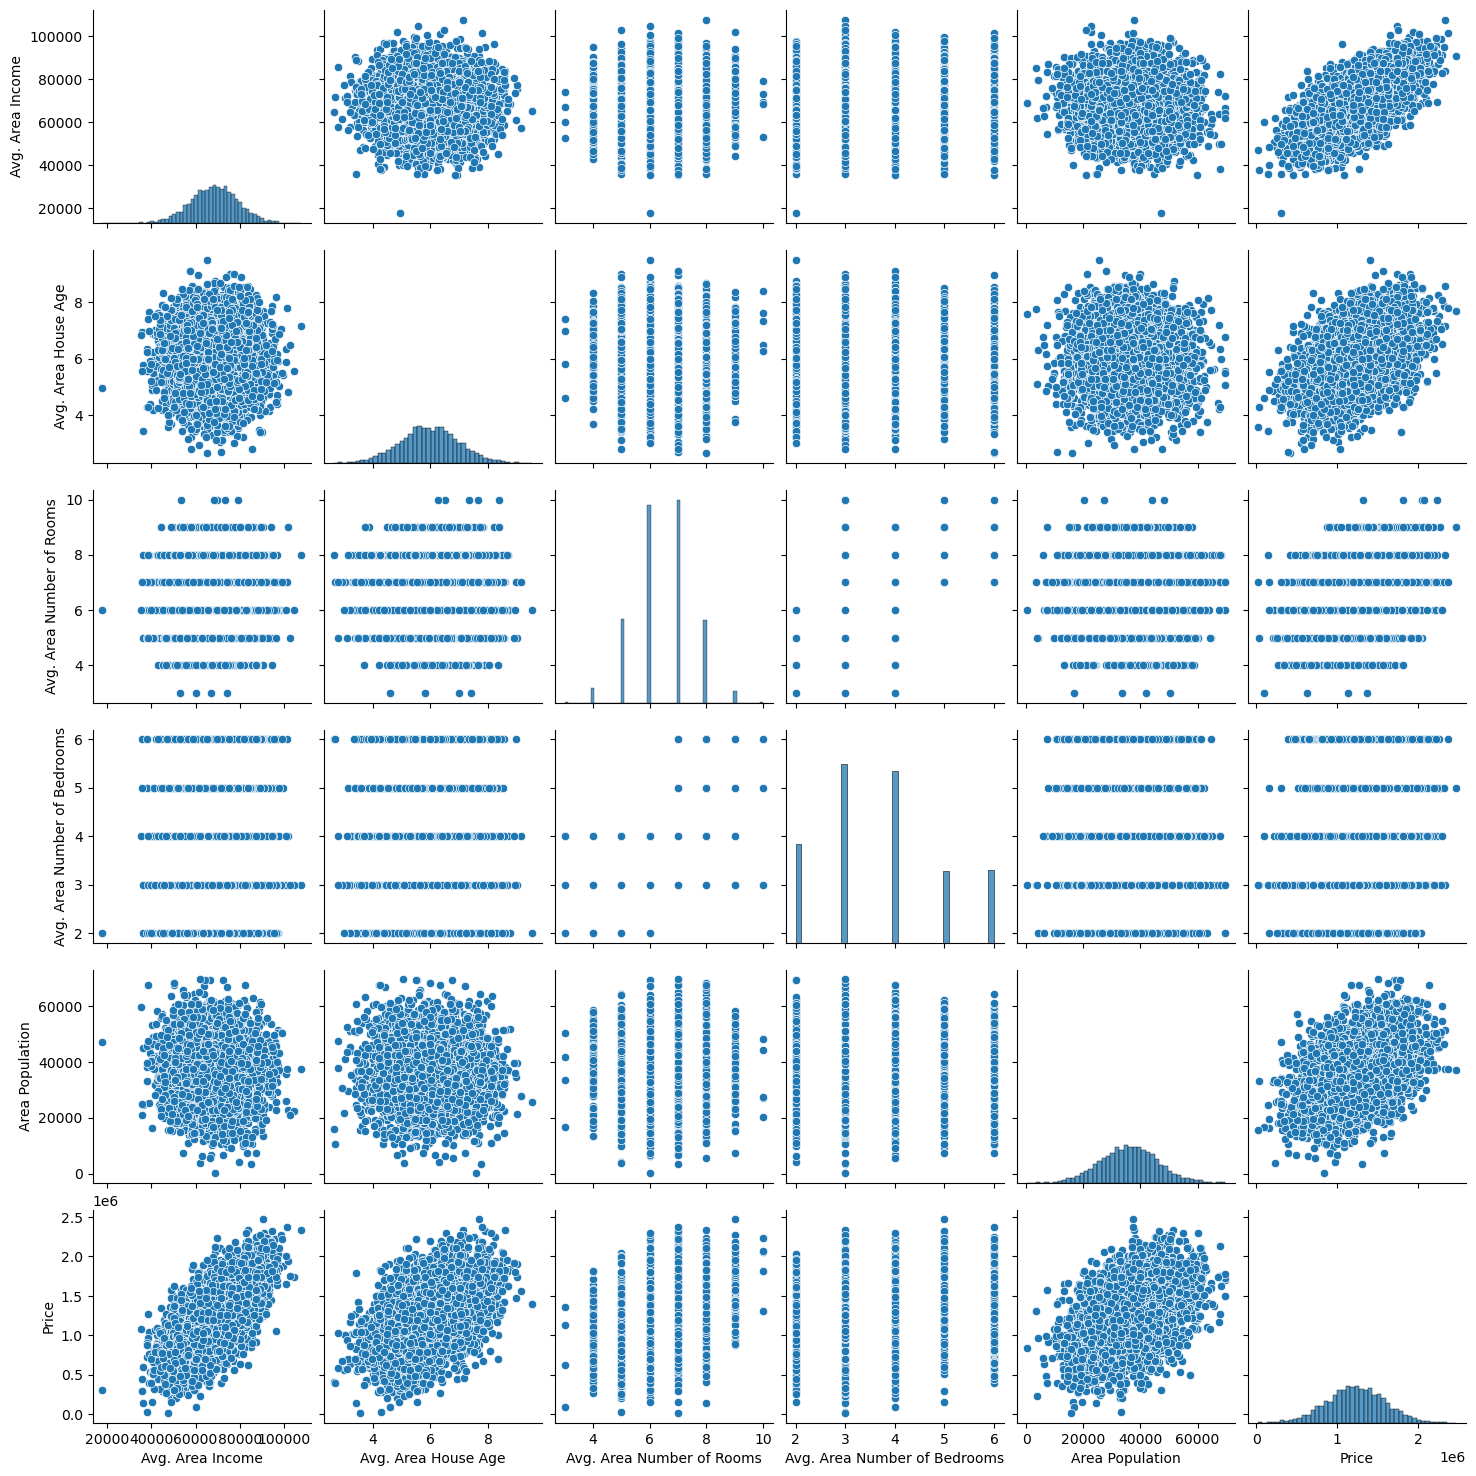

In [22]:
sns.pairplot(df)
plt.show()

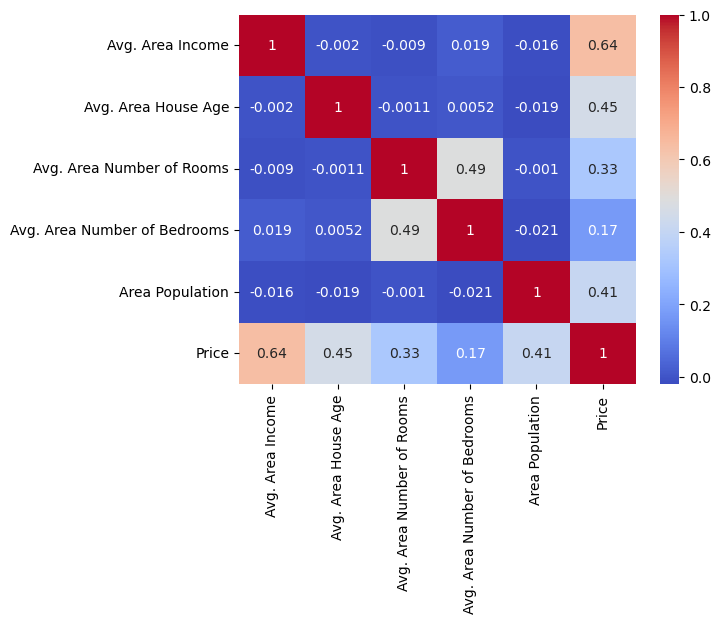

In [26]:
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [32]:
x = df[["Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Avg. Area Income"]]
y = df["Price"]


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [35]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
coef_df = pd.DataFrame({ "Feature": x.columns, "Coefficient": model.coef_ })

In [38]:
print("Intercept:", model.intercept_)

Intercept: -1910372.161053833


In [39]:
coef_df

,Feature,Coefficient
0,Avg. Area House Age,160996.748185
1,Avg. Area Number of Rooms,109909.130478
2,Avg. Area Number of Bedrooms,605.819399
3,Avg. Area Income,21.333800


In [41]:
y_pred = model.predict(x_test)

In [52]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse) # mean square error
print("MAE:", mae) # mean absolute error
print("RMSE:", rmse) #R mean square error
print("R sq. Score:",r2) # r square error

MSE: 33312125222.43471
MAE: 142981.46527142412
RMSE: 182516.0957900281
R sq. Score: 0.7292411536958365


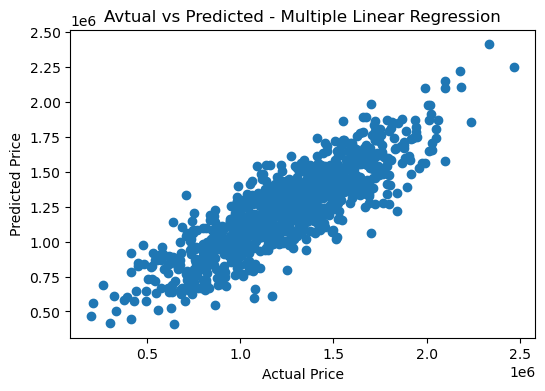

In [49]:
# Data Visualization

plt.figure(figsize = (6,4))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Avtual vs Predicted - Multiple Linear Regression")
plt.show()